## Import library

In [1]:
import graphviz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from IPython.display import Image
import pydotplus

## Load dataset

In [2]:
data = pd.read_csv("C:/Users/ekyfe/Documents/college/Semester 4/Data Mining/PBL/healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
missing_values = data.isna().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


## Melakukan penanganan nilai-nilai yang hilang (missing values)

In [5]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


## Melakukan encoding

In [6]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['ever_married'] = le.fit_transform(data['ever_married'])
data['work_type'] = le.fit_transform(data['work_type'])
data['Residence_type'] = le.fit_transform(data['Residence_type'])
data['smoking_status'] = le.fit_transform(data['smoking_status'])

## Memisahkan fitur dan target variabel

In [7]:
X = data.drop(['id', 'stroke'], axis=1)
y = data['stroke']

print("X:\n", X)
print("y:\n", y)

X:
       gender   age  hypertension  heart_disease  ever_married  work_type  \
0          1  67.0             0              1             1          2   
1          0  61.0             0              0             1          3   
2          1  80.0             0              1             1          2   
3          0  49.0             0              0             1          2   
4          0  79.0             1              0             1          3   
...      ...   ...           ...            ...           ...        ...   
5105       0  80.0             1              0             1          2   
5106       0  81.0             0              0             1          3   
5107       0  35.0             0              0             1          3   
5108       1  51.0             0              0             1          2   
5109       0  44.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  
0             

## Memisahkan data menjadi data latih dan data uji

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])

Jumlah data latih: 4088
Jumlah data uji: 1022


In [9]:
print("X_train:")
print(X_train.head())

print("\nX_test:")
print(X_test.head())

print("\ny_train:")
print(y_train.head())

print("\ny_test:")
print(y_test.head())

X_train:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
802        1  79.0             0              0             1          3   
3927       0  62.0             0              0             1          2   
2337       0  21.0             0              0             0          2   
3910       1  31.0             0              0             1          0   
1886       0  31.0             0              0             0          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
802                0             112.64  28.5               1  
3927               1              88.32  36.3               0  
2337               0              59.52  33.7               2  
3910               1              65.70  30.4               1  
1886               0              59.63  19.9               2  

X_test:
      gender   age  hypertension  heart_disease  ever_married  work_type  \
4688       1  31.0             0              0             0    

## Pemodelan menggunakan Logistic regression

In [10]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Melakukan prediksi pada data uji dan evaluasi model menggunakan Logistic regression

In [11]:
# Prediksi dengan data uji
y_pred = lr.predict(X_test)

In [12]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Logistic Regression: {accuracy * 100:.2f}%')

Akurasi model Logistic Regression: 93.93%


In [13]:
# Laporan klasifikasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



C:\Users\ekyfe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ekyfe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ekyfe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [14]:
# Laporan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[960   0]
 [ 62   0]]


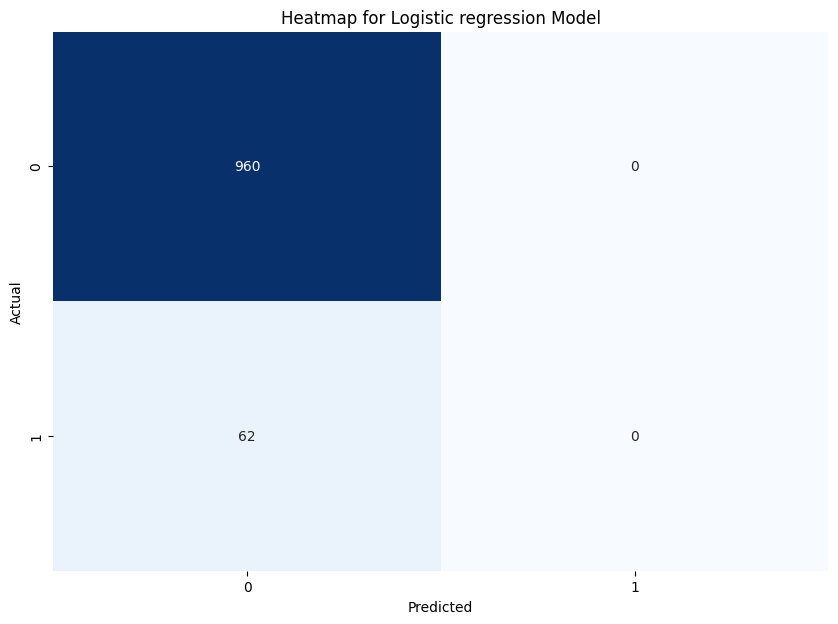

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=lr.classes_, columns=lr.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap for Logistic regression Model')
plt.show()

## Pemodelan menggunakan Random Forest Classifier

In [16]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Melakukan prediksi pada data uji dan evaluasi model menggunakan Random Forest Classifier

In [17]:
# Prediksi dengan data uji
y_pred = rf.predict(X_test)

In [18]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Random Forest Classifier: {accuracy * 100:.2f}%')

Akurasi model Random Forest Classifier: 93.84%


In [19]:
# Laporan klasifikasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



In [20]:
# Laporan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[959   1]
 [ 62   0]]


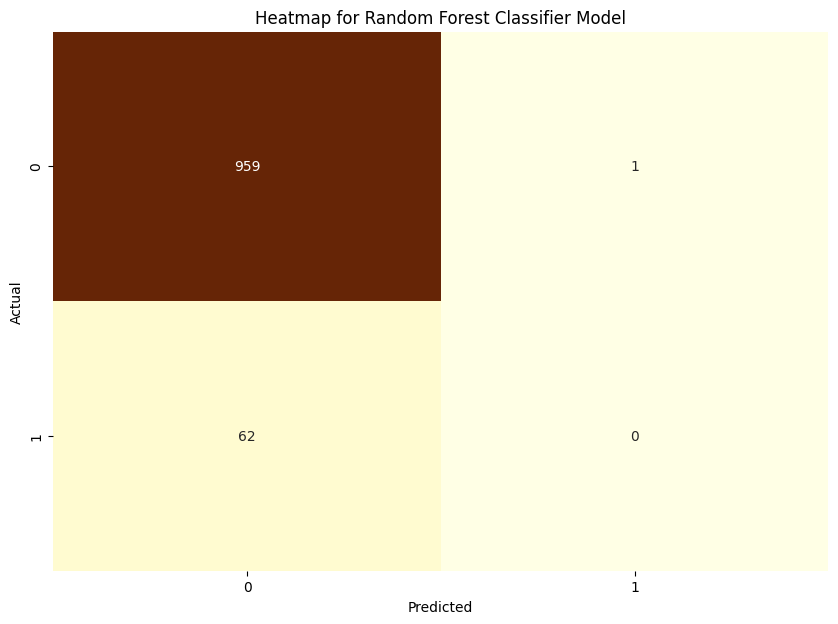

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=rf.classes_, columns=rf.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='YlOrBr', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap for Random Forest Classifier Model')
plt.show()

## Pemodelan menggunakan KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Melakukan prediksi pada data uji dan evaluasi model menggunakan KNN

In [23]:
# Prediksi dengan data uji
y_pred = knn.predict(X_test)

In [24]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy * 100:.2f}%')

Akurasi model KNN: 93.44%


In [25]:
# Laporan klasifikasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.93      0.91      1022



In [26]:
# Laporan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[955   5]
 [ 62   0]]


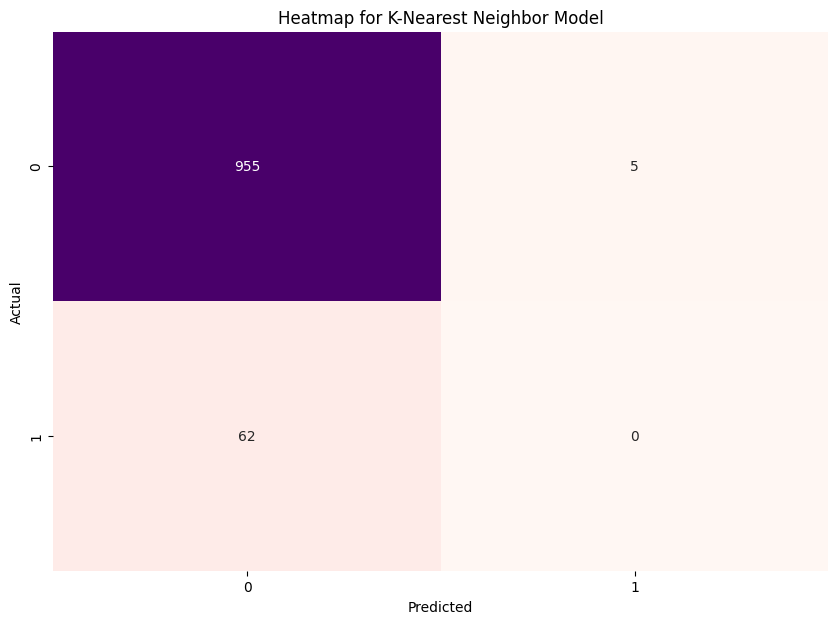

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=knn.classes_, columns=knn.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='RdPu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap for K-Nearest Neighbor Model')
plt.show()

## Pemodelan menggunakan Gaussian Naive Bayes

In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## Melakukan prediksi pada data uji dan evaluasi model menggunakan Gaussian Naive Bayes

In [29]:
# Prediksi dengan data uji
y_pred = nb.predict(X_test)

In [30]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model Gaussian Naive Bayes: {accuracy * 100:.2f}%')

Akurasi model Gaussian Naive Bayes: 86.69%


In [31]:
# Laporan klasifikasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       960
           1       0.22      0.47      0.30        62

    accuracy                           0.87      1022
   macro avg       0.59      0.68      0.61      1022
weighted avg       0.92      0.87      0.89      1022



In [32]:
# Laporan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[857 103]
 [ 33  29]]


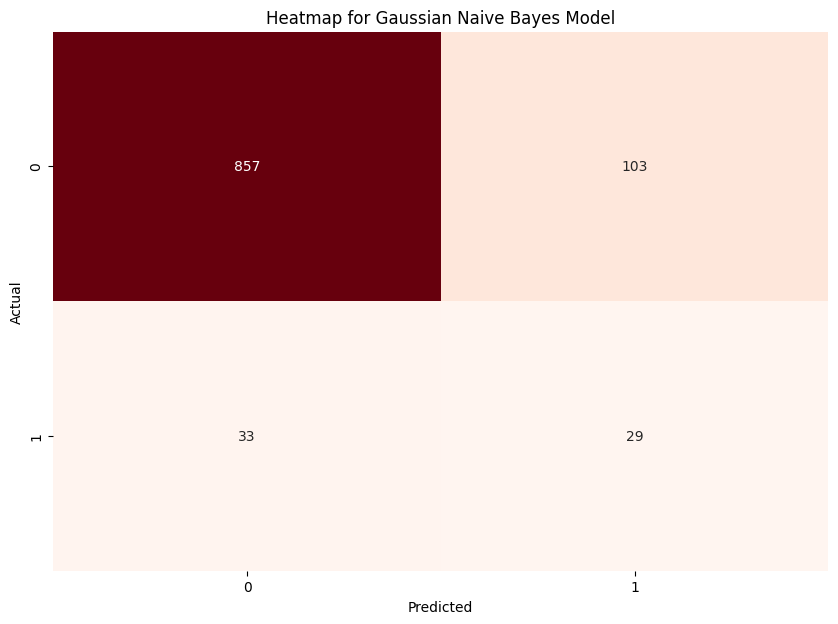

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=nb.classes_, columns=nb.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap for Gaussian Naive Bayes Model')
plt.show()

## Pemodelan menggunakan Decision Tree Classifier

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Melakukan prediksi pada data uji dan evaluasi model menggunakan Decision Tree Classifier

In [35]:
# Prediksi dengan data uji
y_pred = dt.predict(X_test)

In [36]:
# Hitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi model decision tree: {accuracy * 100:.2f}%')

Akurasi model decision tree: 91.19%


In [37]:
# Laporan klasifikasi
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.21      0.16      0.18        62

    accuracy                           0.91      1022
   macro avg       0.58      0.56      0.57      1022
weighted avg       0.90      0.91      0.91      1022



In [38]:
# Laporan Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[922  38]
 [ 52  10]]


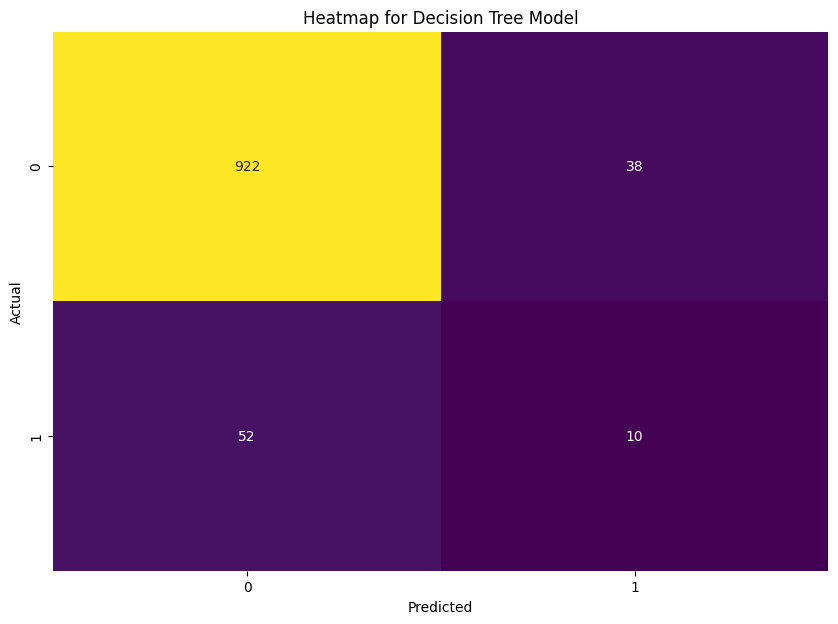

In [39]:
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_df = pd.DataFrame(conf_matrix, index=dt.classes_, columns=dt.classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heatmap for Decision Tree Model')
plt.show()

## Comparison model

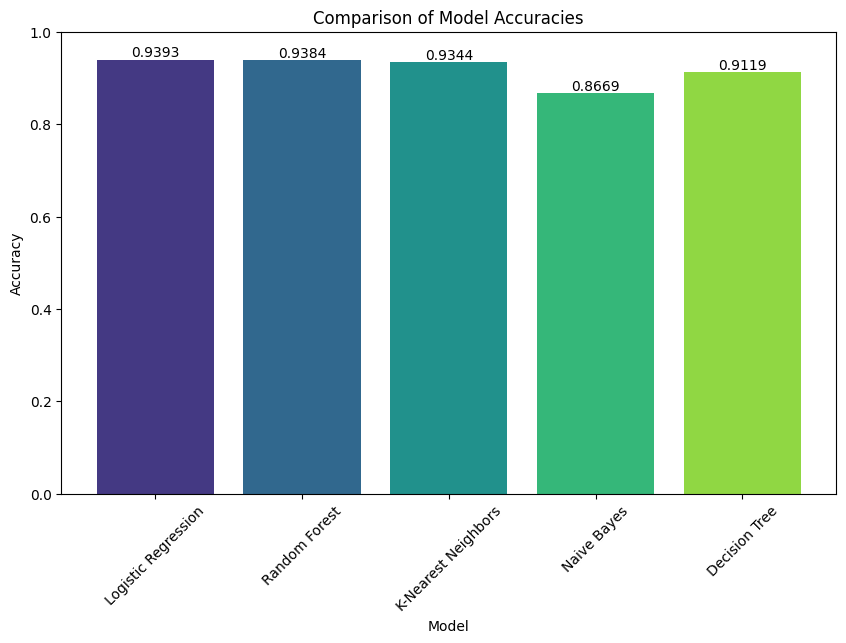

In [40]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

cmap = sns.color_palette("viridis", n_colors=len(accuracy_df))

plt.figure(figsize=(10, 6))
bars = plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'], color=cmap)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.4f}', 
        ha='center',
        va='bottom'
    )

plt.show()

## Prediksi

In [41]:
def get_user_input():
    age = float(input("Masukkan usia: "))
    gender = int(input("Jenis kelamin (0 = Pria, 1 = Wanita): "))
    hypertension = int(input("Apakah Anda memiliki hipertensi? (1 = Ya, 0 = Tidak): "))
    heart_disease = int(input("Apakah Anda memiliki penyakit jantung? (1 = Ya, 0 = Tidak): "))
    ever_married = int(input("Apakah Anda pernah menikah? (1 = Ya, 0 = Tidak): "))
    work_type = int(input("Jenis pekerjaan (0 = Private, 1 = Self-employed, 2 = Govt_job, 3 = children, 4 = Never_worked): "))
    residence_type = int(input("Tipe tempat tinggal (0 = Urban, 1 = Rural): "))
    avg_glucose_level = float(input("Masukkan rata-rata kadar glukosa dalam darah: "))
    bmi = float(input("Masukkan indeks massa tubuh (BMI): "))
    smoking_status = int(input("Status merokok (0 = never smoked, 1 = Unknown, 2 = formerly smoked, 3 = smokes): "))
    
    return [age, gender, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status]

def predict_stroke(features, dt):
    age, gender, hypertension, heart_disease, ever_married, work_type, residence_type, avg_glucose_level, bmi, smoking_status = features
    if hypertension == 1 or heart_disease == 1 or avg_glucose_level > 200:
        return "Resiko stroke tinggi."
    else:
        prediction = dt.predict([features])
        if prediction:
            return "Resiko stroke rendah."
        else:
            return "Resiko stroke rendah."

user_input = get_user_input()
predicted_result = predict_stroke(user_input, dt)
print("\nHasil Prediksi:", predicted_result)

Masukkan usia: 10
Jenis kelamin (0 = Pria, 1 = Wanita): 1
Apakah Anda memiliki hipertensi? (1 = Ya, 0 = Tidak): 0
Apakah Anda memiliki penyakit jantung? (1 = Ya, 0 = Tidak): 0
Apakah Anda pernah menikah? (1 = Ya, 0 = Tidak): 0
Jenis pekerjaan (0 = Private, 1 = Self-employed, 2 = Govt_job, 3 = children, 4 = Never_worked): 3
Tipe tempat tinggal (0 = Urban, 1 = Rural): 0
Masukkan rata-rata kadar glukosa dalam darah: 120
Masukkan indeks massa tubuh (BMI): 36
Status merokok (0 = never smoked, 1 = Unknown, 2 = formerly smoked, 3 = smokes): 0

Hasil Prediksi: Resiko stroke rendah.


C:\Users\ekyfe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Decision tree

C:\Users\ekyfe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Hasil Prediksi: Resiko stroke rendah.


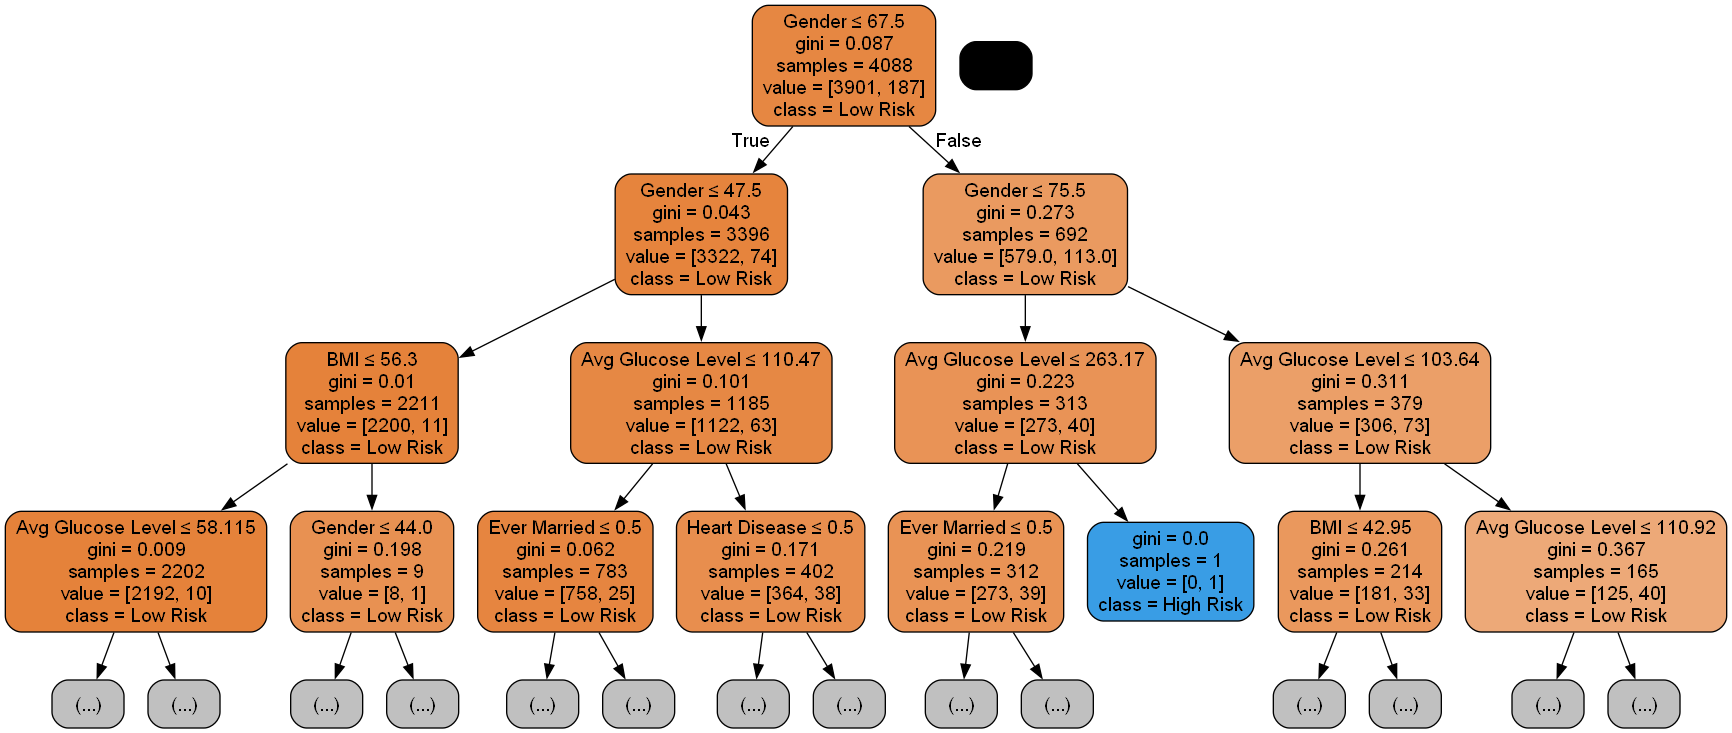

In [42]:
predicted_result = predict_stroke(user_input, dt)
print("Hasil Prediksi:", predicted_result)

class_order = ["Low Risk", "High Risk"] if predicted_result == "Resiko stroke rendah." else ["High Risk", "Low Risk"]

dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=["Age", "Gender", "Hypertension", "Heart Disease", "Ever Married", "Work Type", "Residence Type", "Avg Glucose Level", "BMI", "Smoking Status"],  
                           class_names=class_order,  
                           filled=True, rounded=True,  
                           special_characters=True,
                           max_depth=3)  

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())